# Introduction, documentation and other comments
The original version was made on 04/25/2022 by Rafael da Fonte Freire (rafaeldafontefreire@gmail.com) as part of Data Pipeline team of the 11th semester of the Air Partners ADE project at Olin College. Here is the assumption test further documenting the original version:


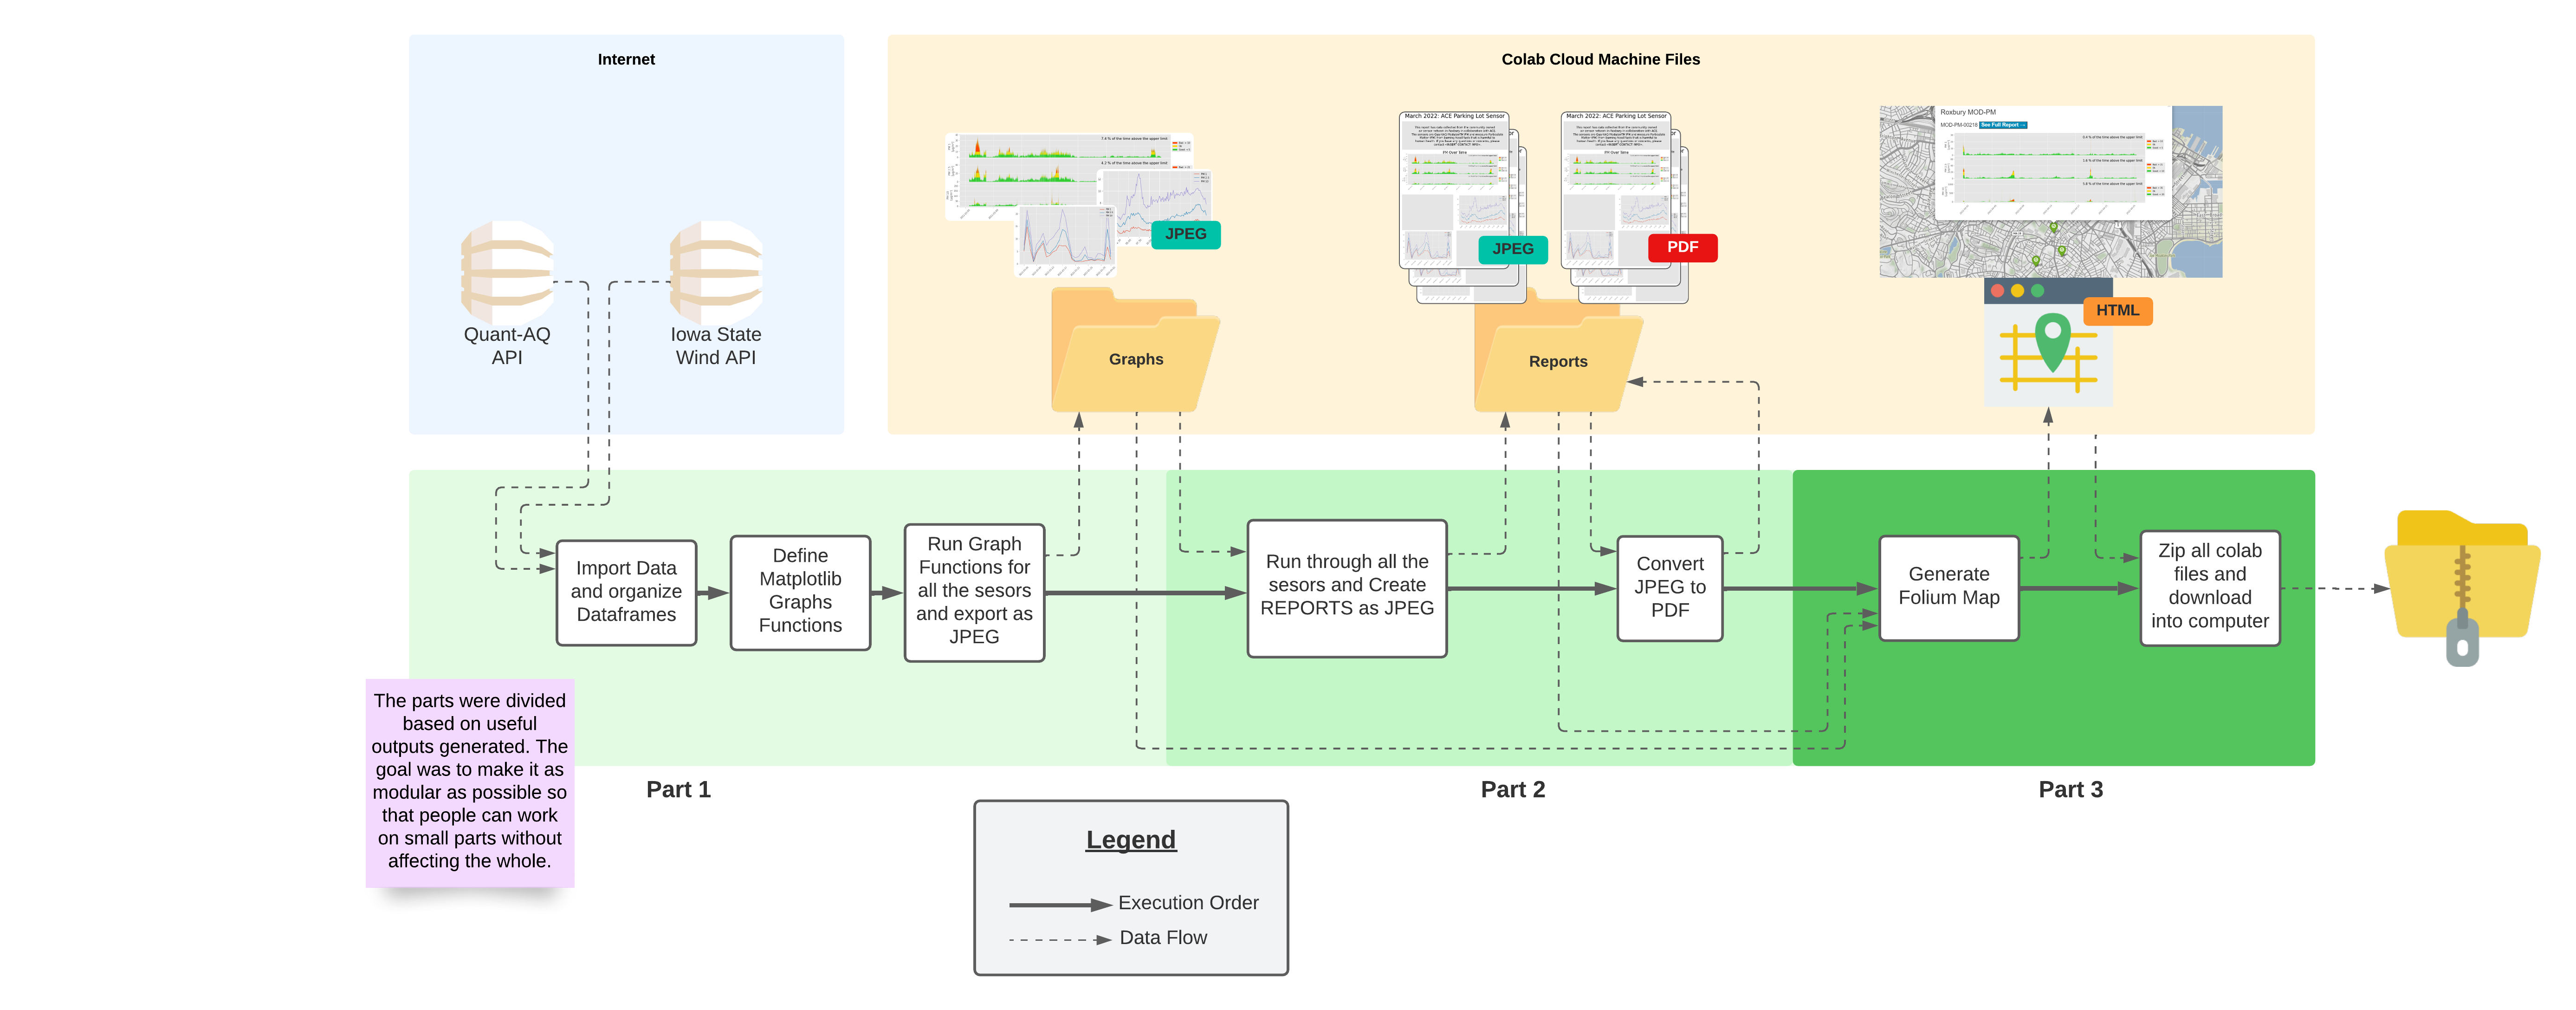

Running this code:



1.   Change the year and month to the desired period in the "Initial Inputs" Section.
2.   Run All.
3.   After it is done running, it will start downloading a zip file with all the graphs, reports and the map generated. Make sure to extract the file before start using it.



---
Tips:

*   This program was designed to be easily modifiable & quickly adapt to feedback from ACE by breaking it down into small, simple functions. For it to still work this way, make sure to:
  *   Keep the program modular - Avoid making codes that will not function if another part of the code has changed
  *   Keep it easy to understand - This program has to be quickly understood by the next teams, so avoid using complicated new libraries, for example, even if it is more efficient.




---
To do: <br>
Part 1:
*   Import Wind Data
*   Make wind data Graph
*   Make Calendar Plot

Part 2:
*   Aesthetics of the report
*   Written content

Part 3:
*   Use data to modify markers in the map to highlight alarming pollution levels.
*   Validate usability with ACE.





# Initial Inputs !!Configure Here!!

In [5]:
month = 5
year = 2022

Quant_AQ_API_key = "VSZMMY8VT8FIRNIIXWTD2G7V"

# Part 1 - Import Data and Generate Graphs

## Import QuantAQ and Wind Data

### List of sensors and connection status

In [6]:
import pandas as pd
import quantaq
from quantaq.utils import to_dataframe
from datetime import datetime,timedelta
client = quantaq.QuantAQAPIClient(api_key=Quant_AQ_API_key)
def sensor_list():
  devices_raw = to_dataframe(client.devices.list(filter="city,like,%_oxbury%"))
  devices_simplified = devices_raw.iloc[:,[4,3,11,15,16,5,7,8,10,12]]
  return devices_simplified,devices_raw

nowutc = datetime.utcnow()
df_sensor_list,devices_raw = sensor_list()
df_sensor_list.head(5)

,id,description,sn,geo.lat,geo.lon,last_seen,n_datapoints,outdoors,private,status
0,403,Roxbury MOD-PM,MOD-PM-00216,NaN,NaN,2022-03-04T19:19:38.816220,77803,True,True,ACTIVE
1,408,Roxbury MOD-PM,MOD-PM-00221,NaN,NaN,2022-03-04T19:21:38.505520,85620,True,True,ACTIVE
2,418,Roxbury MOD-PM,MOD-PM-00231,NaN,NaN,2022-03-04T19:28:28.055324,86521,True,True,ACTIVE
3,405,Roxbury MOD-PM,MOD-PM-00218,42.331538,-71.083602,2022-06-01T02:20:59.803861,155233,True,False,ACTIVE
4,398,Roxbury MOD-PM,MOD-PM-00211,NaN,NaN,2022-03-04T19:16:57.919527,63857,True,True,ACTIVE


### PMs of a specific sensor in a specific month

In [7]:
import pandas as pd
import quantaq
from quantaq.utils import to_dataframe
from datetime import datetime, timedelta
client = quantaq.QuantAQAPIClient(api_key=Quant_AQ_API_key)

year_month = str(year) + '-0' + str(month) if month<=9 else str(year) + '-' + str(month)

def data_month(month_int,year_int_YYYY,sensor_sn):        
    df = []
    if month_int == 12:
        start_date = '{0}-{1}-01'.format(year_int_YYYY, month_int)
        end_date = '{0}-{1}-01'.format(year_int_YYYY+1, 1)
    else:
        start_date = '{0}-{1}-01'.format(year_int_YYYY,month_int)
        end_date = '{0}-{1}-01'.format(year_int_YYYY,month_int+1)
    number_of_days = len(pd.date_range(start=start_date,end=end_date))
    c = 1
    for each in pd.date_range(start=start_date,end=end_date):
        df.append(to_dataframe(client.data.bydate(sn=sensor_sn, date=str(each.date()))))
        print('\r Day Progress: {0} / {1}'.format(c,number_of_days), end='', flush=True)
        c+=1
    df = pd.concat(df)
    if not df.empty:
      df_simplified = df.iloc[:,[0,1,2,4,5,7,8]]
      return df_simplified
    else:
      return df

list_of_sensors_sn = list(df_sensor_list.sn)
total_amount_of_sensor = len(list_of_sensors_sn)
dic_of_PM_df_by_sn = {}

sensor_count = 1
for sn in list_of_sensors_sn:
  print('\rSensor Progress: {0} / {1}\n'.format(sensor_count,total_amount_of_sensor), end='', flush=True)
  dic_of_PM_df_by_sn[sn] = data_month(month,year,sn) 
  sensor_count+=1
print('\nDone!')

#sn='MOD-PM-00218';data_month(3,2022,sn) # test

Sensor Progress: 1 / 21
Sensor Progress: 2 / 21
Sensor Progress: 3 / 21
Sensor Progress: 4 / 21
Sensor Progress: 5 / 21
Sensor Progress: 6 / 21
Sensor Progress: 7 / 21
Sensor Progress: 8 / 21
Sensor Progress: 9 / 21
Sensor Progress: 10 / 21
Sensor Progress: 11 / 21
Sensor Progress: 12 / 21
Sensor Progress: 13 / 21
Sensor Progress: 14 / 21
Sensor Progress: 15 / 21
Sensor Progress: 16 / 21
Sensor Progress: 17 / 21
Sensor Progress: 18 / 21
Sensor Progress: 19 / 21
Sensor Progress: 20 / 21
Sensor Progress: 21 / 21
 Day Progress: 32 / 32
Done!


### Import Wind Data

## Matplotlib Graphs Functions Definition

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Calendar Plot

### Timeplot with thresholds

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib.offsetbox import AnchoredText

def timeplot_threshold(data_PM):
  def detect_inactive_sensor(df, timedelta_to_consider_inactive_in_minutes):
    inactive = [0]
    for i in range(1, len(df)):
      timedelta = (df.timestamp_local.iloc[i] - df.timestamp_local.iloc[i-1]).total_seconds()/60
      if timedelta >= timedelta_to_consider_inactive_in_minutes:
        inactive.append(1)
        inactive[i-1] = 1
      else:
        inactive.append(0)
    df['inactive'] = inactive

  detect_inactive_sensor(data_PM,5)

  def thresholds_subplots(plot_number, threshold_lower,threshold_upper):
    if plot_number == 0:
      pm = pm1
      ylabel = 'PM 1'
    elif plot_number == 1:
      pm = pm25
      ylabel = 'PM 2.5'
    elif plot_number == 2:
      pm = pm10
      ylabel = 'PM 10'
    axs[plot_number].fill_between(ts, pm, 0, where=(data_PM.inactive == 0), facecolor="limegreen", interpolate=True, alpha=1,label='Good: < {}'.format(threshold_lower))
    axs[plot_number].fill_between(ts, pm, threshold_lower, where=(data_PM.inactive == 0) & (pm >= threshold_lower), facecolor="gold", interpolate=False, alpha=1,label='Ok')
    axs[plot_number].fill_between(ts, pm, threshold_upper, where=(pm >= threshold_upper), facecolor="orangered", interpolate=False, alpha=1,label='Bad: > {}'.format(threshold_upper))
    axs[plot_number].set_ylabel('{}\n[μg/m³]'.format(ylabel))
    
    handles, labels = axs[plot_number].get_legend_handles_labels()
    axs[plot_number].legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.0,0.5),loc = 'center left')

    try:
      percent_above_upper = (pm >= threshold_upper).value_counts(True).sort_values()[1]
    except:
      percent_above_upper = 0

    at = AnchoredText(
        "{} % of the time above the upper limit".format(round((percent_above_upper * 100),1)), prop=dict(size=15), frameon=False, loc='upper right')
    #at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    axs[plot_number].add_artist(at)

  pm1 = data_PM.pm1
  pm25 = data_PM.pm25
  pm10 = data_PM.pm10
  ts = data_PM.timestamp_local

  fig2, axs = plt.subplots(3, sharex=True, sharey=False, figsize=(17,6))
  plt.subplots_adjust(hspace=.0)
  plt.xticks(rotation=45)

  thresholds_subplots(0, 5, 10)
  thresholds_subplots(1, 10, 21)
  thresholds_subplots(2, 20, 35)

  # Hide x labels and tick labels for all but bottom plot.
  for ax in axs:
      ax.label_outer()

### Time of day plot

In [ ]:
from matplotlib.ticker import MaxNLocator

def time_of_day_plot(dataPM):
  dataPM_10min = dataPM.set_index('timestamp_local').resample('10T').mean()
  dataPM_10min['hour_minute'] = dataPM_10min.index.strftime('%H:%M')
  dataPM_10min = dataPM_10min.groupby('hour_minute').mean()

  fig,axes=plt.subplots(1,1,figsize=(8,5))
  axes.plot(dataPM_10min.index,dataPM_10min.pm1, label = 'PM 1')
  axes.plot(dataPM_10min.index,dataPM_10min.pm25, label = 'PM 2.5')
  axes.plot(dataPM_10min.index,dataPM_10min.pm10, label = 'PM 10')
  axes.xaxis.set_major_locator(MaxNLocator(15.8)) 
  axes.legend()
  axes.set_ylabel("[μg/m³]")
  for tick in axes.get_xticklabels():
      tick.set_rotation(45)

### Daily average plot

In [ ]:
def daily_average_plot(dataPM):
  dataPM_day = dataPM.set_index('timestamp_local').resample('1D').mean()
  plt.style.use('ggplot')

  fig,axes=plt.subplots(1,1,figsize=(8,5))
  axes.plot(dataPM_day.pm1, label = 'PM 1')
  axes.plot(dataPM_day.pm25, label = 'PM 2.5')
  axes.plot(dataPM_day.pm10, label = 'PM 10')
  axes.set_ylabel("[μg/m³]")  
  axes.legend()
  for tick in axes.get_xticklabels():
      tick.set_rotation(45)

### Wind polar plot

## Generate and Export Graphs

In [ ]:
import os
def plot_and_export(plot_function):
  try:
    os.mkdir('{}'.format(year_month))
  except:
    pass
  try:
    os.mkdir('{}/Graphs/'.format(year_month))
  except: 
    pass
  try:
    os.mkdir('{}/Graphs/'.format(year_month)+str(plot_function.__name__))
  except: # Forgive my crime here, but it just avoids errors if the directory already exists
    pass
  for sn in list_of_sensors_sn:
    if not dic_of_PM_df_by_sn[sn].empty:
      plot_function(dic_of_PM_df_by_sn[sn])
      plt.savefig('{1}/Graphs/{2}/{0}_{1}_{2}.jpeg'.format(sn,year_month,str(plot_function.__name__)), bbox_inches='tight',dpi = 300)

#plot_and_export(calendar_plot)
plot_and_export(timeplot_threshold)
plot_and_export(time_of_day_plot)
plot_and_export(daily_average_plot)
#plot_and_export(wind_polar_plot)

# Part 2 - Import Graphs and Generate Reports

## Generate Reports as JPEG

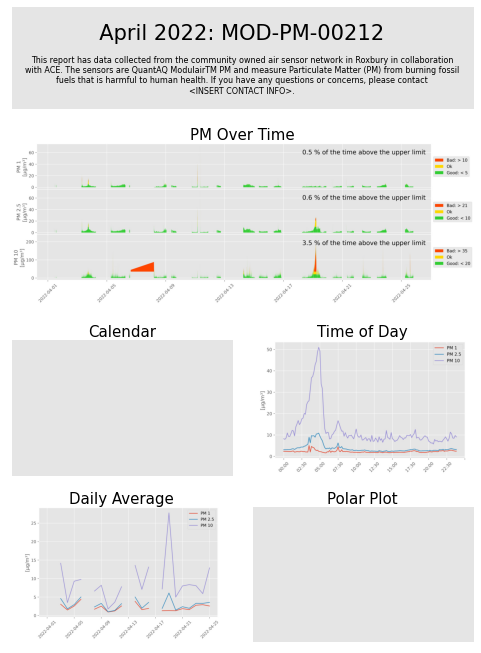

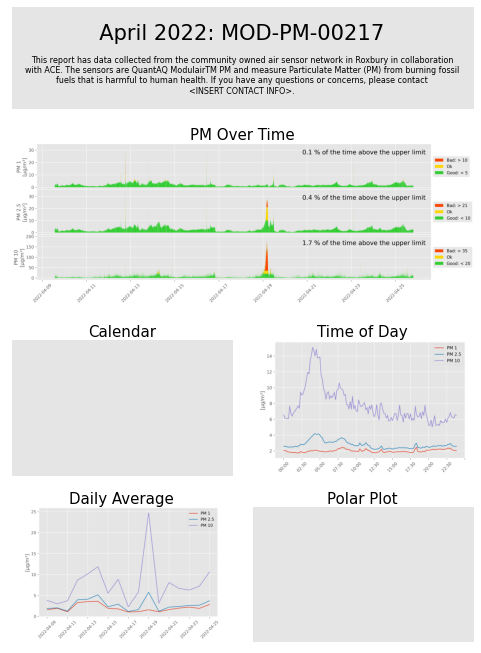

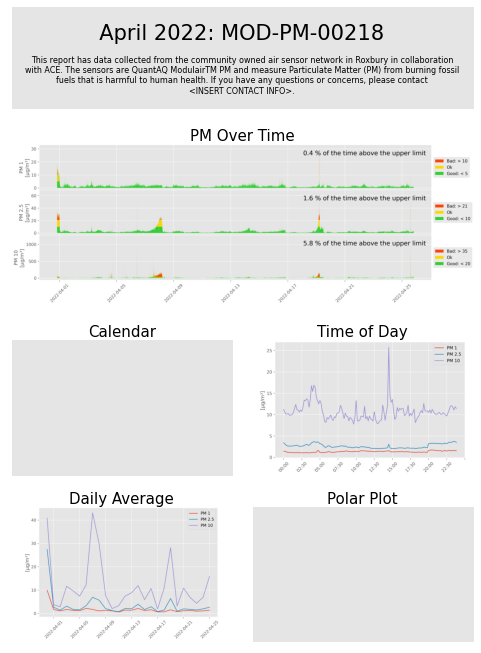

In [ ]:
import matplotlib.image as mpimg

def generate_report(dataPM, sn):
  ## Figure config    
  def import_and_plot_img(plot_function):
    plt.grid(0);plt.yticks([]);plt.xticks([])
    img = mpimg.imread('{1}/Graphs/{2}/{0}_{1}_{2}.jpeg'.format(sn,year_month,str(plot_function.__name__)))
    plt.imshow(img)
  fig = plt.figure(figsize=(8.3,11.7))
  grid = plt.GridSpec(20, 6, wspace=0.3, hspace=10)
  graph_title_position = 0.98
  graph_title_size = 15

  ## Header
  fig.add_subplot(grid[:4,:])
  plt.grid(0);plt.yticks([]);plt.xticks([])
  plt.title(
'This report has data collected from the community owned air sensor network in Roxbury in collaboration\n\
with ACE. The sensors are QuantAQ ModulairTM PM and measure Particulate Matter (PM) from burning fossil\n\
fuels that is harmful to human health. If you have any questions or concerns, please contact\n\
<INSERT CONTACT INFO>.'
      ,fontsize=8, y=0.1)
  dic_month = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",
               7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
  plt.suptitle('  {0} {1}: {2}'.format(dic_month[month],year,sn),fontsize=21, y=0.86)

  ## Timeplots with Thresholds
  fig.add_subplot(grid[4:10,:])
  import_and_plot_img(timeplot_threshold)
  plt.title('PM Over Time', y=graph_title_position,fontsize=graph_title_size)
  

  ## Calendar plot
  fig.add_subplot(grid[10:15,:3])
  plt.title('Calendar', y=graph_title_position,fontsize=graph_title_size)
  plt.grid(0);plt.yticks([]);plt.xticks([])

  ## Time of day plot
  fig.add_subplot(grid[10:15,3:6])
  plt.title('Time of Day', y=graph_title_position,fontsize=graph_title_size)
  import_and_plot_img(time_of_day_plot)

  ## Daily average plot
  fig.add_subplot(grid[15:20,:3])
  plt.title('Daily Average', y=graph_title_position,fontsize=graph_title_size)
  import_and_plot_img(daily_average_plot)

  ## Polar plot
  fig.add_subplot(grid[15:20,3:6])
  plt.title('Polar Plot', y=graph_title_position,fontsize=graph_title_size)
  plt.grid(0);plt.yticks([]);plt.xticks([])

try:
  os.mkdir('{}/Reports'.format(year_month))
except: # Forgive my crime here, but it just avoids errors if the directory already exists
  pass
for sn in list_of_sensors_sn:
  if not dic_of_PM_df_by_sn[sn].empty:
    generate_report(dic_of_PM_df_by_sn[sn],sn)
    plt.savefig('{1}/Reports/{0}_{1}_{2}.jpeg'.format(sn,year_month,str('Report')), bbox_inches='tight',dpi = 300)


## Convert JPEG Reports to PDF

In [ ]:
!pip install img2pdf
import img2pdf
def img2pdf_function(img_path,pdf_path):
    ImgFile = open(img_path,"rb")
    PdfFile = open(pdf_path,"wb")
    PdfFile.write(img2pdf.convert(ImgFile))
    ImgFile.close()
    PdfFile.close()

try:
  os.mkdir('{}/Reports/PDFs'.format(year_month))
except: # Forgive my crime here, but it just avoids errors if the directory already exists
  pass
for sn in list_of_sensors_sn:
  if not dic_of_PM_df_by_sn[sn].empty:
    img2pdf_function('{1}/Reports/{0}_{1}_{2}.jpeg'.format(sn,year_month,str('Report')),
                     '{1}/Reports/PDFs/{0}_{1}_{2}.pdf'.format(sn,year_month,str('Report')))

# Part 3 - Folium Grid Map

## Generate Map

In [ ]:
import folium 
import math
import base64
def current_map(df_sensor_list):
    def check_sensor_status(sensor_last_seen):
        last_seen_utctime = datetime.fromisoformat(sensor_last_seen.replace("T"," "))
        acceptable_timedelta = timedelta(minutes=20)
        actual_timedelta = nowutc-last_seen_utctime
        if acceptable_timedelta>actual_timedelta:
            return True
        else:
            return False
    rox_latlng = [42.32877000000008, -71.08440999999993]
    map_rox = folium.Map(location=rox_latlng, zoom_start=13.5, tiles ='Stamen Terrain')
    for i in range(len(df_sensor_list)):
        if not math.isnan(df_sensor_list["geo.lat"][i]) and not dic_of_PM_df_by_sn[df_sensor_list.sn[i]].empty:

            if check_sensor_status(df_sensor_list.last_seen[i]):
                html = """
                      <h3>{2}<\h3>
                      <h4>{0}
                      <a href="../{1}/Reports/PDFs/{0}_{1}_Report.pdf" target="_blank">
                        <button type="button" style="background-color: #008CBA;color: white"><b>See Full Report →</b></button>
                      </a>
                      <\h4>
                      <img src="Graphs/timeplot_threshold/{0}_{1}_timeplot_threshold.jpeg" alt="Graph not found, make sure the folder is unziped" width="800" height="300">
                    """.format(df_sensor_list.sn[i],year_month,df_sensor_list.description[i])
                icon_color, icon_symbol = "green", "glyphicon-ok-circle"
                
            else:
                label = '**{0}** <br>\
                        Last Seen: {1}<br>'.format(df_sensor_list.description[i],df_sensor_list.last_seen[i])
                label = folium.Popup(label, parse_html=True)

            folium.Marker(
                    location = [df_sensor_list["geo.lat"][i],df_sensor_list["geo.lon"][i]],
                    popup=folium.Popup(folium.Html(html,script=True),max_width=1000),
                    icon=folium.Icon(color=icon_color, icon=icon_symbol)).add_to(map_rox)
    map_rox.save("{}/Roxbury_Grid_Map.html".format(year_month))
    return map_rox
map_rox = current_map(df_sensor_list)

#!!!!!!!!!!!!!!!!!!!!!!#
# THE GRAPHS AND PDFS WON'T WORK IN THIS MAP BECAUSE IT IS USING THE IMAGES ADRESSES AS IF IT WAS IN THE FOLDER TO BE DOWNLOADED.
# USE THIS MAP TO TEST OTHER CONFIGURATIONS. IF YOU WANT TO TEST WITH THE CHARTS, USE THE DOWNLOADED VERSION.
map_rox

## Zip and Download Everything

In [ ]:
original_path = "/content/{}".format(year_month)
new_path = original_path+".zip"
!zip -r "$new_path" "$original_path"
from google.colab import files
files.download('{}.zip'.format(year_month))

updating: content/2022-04/ (stored 0%)
updating: content/2022-04/Graphs/ (stored 0%)
updating: content/2022-04/Graphs/time_of_day_plot/ (stored 0%)
updating: content/2022-04/Graphs/time_of_day_plot/MOD-PM-00217_2022-04_time_of_day_plot.jpeg (deflated 33%)
updating: content/2022-04/Graphs/time_of_day_plot/MOD-PM-00212_2022-04_time_of_day_plot.jpeg (deflated 37%)
updating: content/2022-04/Graphs/time_of_day_plot/MOD-PM-00218_2022-04_time_of_day_plot.jpeg (deflated 35%)
updating: content/2022-04/Graphs/daily_average_plot/ (stored 0%)
updating: content/2022-04/Graphs/daily_average_plot/MOD-PM-00218_2022-04_daily_average_plot.jpeg (deflated 32%)
updating: content/2022-04/Graphs/daily_average_plot/MOD-PM-00212_2022-04_daily_average_plot.jpeg (deflated 36%)
updating: content/2022-04/Graphs/daily_average_plot/MOD-PM-00217_2022-04_daily_average_plot.jpeg (deflated 34%)
updating: content/2022-04/Graphs/timeplot_threshold/ (stored 0%)
updating: content/2022-04/Graphs/timeplot_threshold/MOD-PM-002

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>